In [12]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [20]:
tf.random.set_seed(123)

In [13]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [14]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  
print("가위 이미지 갯수: ", len(images))

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/scissor
가위 이미지 갯수:  332
가위 이미지 resize 완료!


In [15]:
import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  
print("바위 이미지 갯수: ", len(images))

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rock
바위 이미지 갯수:  390
바위 이미지 resize 완료!


In [16]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  
print("보 이미지 갯수: ", len(images))

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/paper
보 이미지 갯수:  419
보 이미지 resize 완료!


In [17]:
def load_data(img_path, number_of_data):
    # 가위 : 0, 바위 : 1, 보 : 2
    # number_of_data=1138   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
   # img_path = "/home/aiffel0042/rock_scissor_paper/"
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
  
#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
print("\n(1) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images = num_images
print("(1) 학습 이미지 갯수: ", num_images)
print("(1) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = x_train_norm
y_train_total = y_train

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_yesica"
print("\n(2) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(2) 학습 이미지 갯수: ", num_images)
print("(2) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_min"
total_num_images += num_images
print("\n(3) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(3) 학습 이미지 갯수: ", num_images)
print("(3) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_yoon"
print("\n(4) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(4) 학습 이미지 갯수: ", num_images)
print("(4) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_minho"
print("\n(5) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(5) 학습 이미지 갯수: ", num_images)
print("(5) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_back"
print("\n(6) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(6) 학습 이미지 갯수: ", num_images)
print("(6) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_tae"
print("\n(7) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(7) 학습 이미지 갯수: ", num_images)
print("(7) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

#train data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_jaeho"
print("\n(8) 학습 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
total_num_images += num_images
print("(8) 학습 이미지 갯수: ", num_images)
print("(8) 총 학습 이미지 갯수: ", total_num_images)
(x_train, y_train)=load_data(image_dir_path, num_images)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_total = np.concatenate([x_train_total, x_train_norm])
y_train_total = np.concatenate([y_train_total, y_train])

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

# test data set
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_others"
print("\n\n(***) 테스트 이미지 디렉토리 경로: ", image_dir_path)

images1=glob.glob(image_dir_path + "/scissor/*.jpg")
images2=glob.glob(image_dir_path + "/paper/*.jpg")
images3=glob.glob(image_dir_path + "/rock/*.jpg")
num_images = len(images1) + len(images2) + len(images3)
print("테스트 총 이미지 갯수: ", num_images)
(x_test, y_test)=load_data(image_dir_path, num_images)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))


(1) 학습 이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper
(1) 학습 이미지 갯수:  1141
(1) 총 학습 이미지 갯수:  1141
학습데이터(x_train)의 이미지 개수는 1141 입니다.
x_train_total shape: (1141, 28, 28, 3)
y_train_total shape: (1141,)

(2) 학습 이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper_yesica
(2) 학습 이미지 갯수:  2162
(2) 총 학습 이미지 갯수:  3303
학습데이터(x_train)의 이미지 개수는 2162 입니다.
x_train_total shape: (3303, 28, 28, 3)
y_train_total shape: (3303,)

(3) 학습 이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper_min
(3) 학습 이미지 갯수:  300
(3) 총 학습 이미지 갯수:  5765
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_total shape: (3603, 28, 28, 3)
y_train_total shape: (3603,)

(4) 학습 이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper_yoon
(4) 학습 이미지 갯수:  300
(4) 총 학습 이미지 갯수:  6065
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_total shape: (3903, 28, 28, 3)
y_train_total shape: (3903,)

(5) 학습 이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper_minho
(5) 학습 이미지 갯수:  600
(5) 총 학습 이미지 갯수:  6665
학습데이터(x_train)의 이미지 개수는 600 입니

라벨:  0


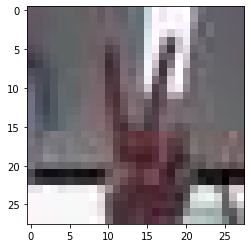

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=64
n_channel_2=128
n_dense=64
n_train_epoch=20
n_class_num = 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_class_num, activation='softmax'))

model.summary()
model.compile(optimizer=keras.optimizers.Adam(0.0003),             
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_total, y_train_total, epochs=n_train_epoch)

print("x_train_total shape: {}".format(x_train_total.shape))
print("y_train_total shape: {}".format(y_train_total.shape))

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

# 고찰 내용

(1) 학습 & 테스트 데이터 측면
: 9천개 정도의 충분히 데이터 양으로 학습시키고, 완전히 다른 9조의 데이터로 테스트 시켜보았더니 77% 이상의 정확도를 갖는 좋은 결과가 나왔다. 

(2) optimizer 파라미터 측면 
: learning rate를 줄여서 학습하는 step을 촘촘하게 했더니 accuracy가 높아졌다 

(3) Conv2D 레이어 파라미터 측면
: n_channel_1=64, 손가락의 다양한 동작이므로 디테일하게 특징을 뽑기 위해 64개의 이미지 특징을 고려함 
: n_channel_2=128, 그 뒤에 128개 이미지 특징씩을 고려함
: n_dense=64, 분류기에 사용하는 뉴런의 숫자로 보다 복잡한 분류기를 만들없음
: n_train_epoch=20, 전체 데이터를 40번 사용해서 학습을 거치는 것입니다.
: n_class_num = 3, 최종 분류기의 클래스 수, 가위, 바위, 보 3개로 지정했음

-----------------------------------------------------------------------------------------

### 학습/테스트 데이터 주고 받기

In [22]:
np.save('x_train.npy',x_train_total)

In [23]:
os.getcwd()

'/home/aiffel0042/workspace'

In [24]:
np.save('y_train.npy',y_train_total)

In [25]:
np.save('x_test.npy',x_test_norm)

In [26]:
np.save('y_test.npy',y_test)